In [7]:
#problem statement
#Devolop a sentiment analysis model to classify restorent reviews as positive or negative.

In [8]:
#Description
# with the rapid growth of online platforms for sharing opininons and reviews,restorants
# on the customer feedback to improve their services and attract new customers.
#analyzing the sentiment of these reviews can provide vakuable insights into customer satisfaction.

In [9]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [10]:
import pandas as pd

In [11]:
data = pd.read_csv('Reviews.csv')

In [12]:
data

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [13]:
data.head()  # Top 5 rows of the datasets

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [14]:
data.tail() # Last 5 rows of the datasets

,Review,Liked
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


In [15]:
data.info() # information ofn the dataset like , datatype , memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [16]:
data.describe() # stastical information of the dataset

,Liked
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [17]:
#checking the null values of the datasets
data.isnull().sum()

Review    0
Liked     0
dtype: int64

In [18]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [19]:
#checking the value counts
value_counts = data['Liked'].value_counts()
print(value_counts)

Liked
1    500
0    500
Name: count, dtype: int64


In [20]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [21]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

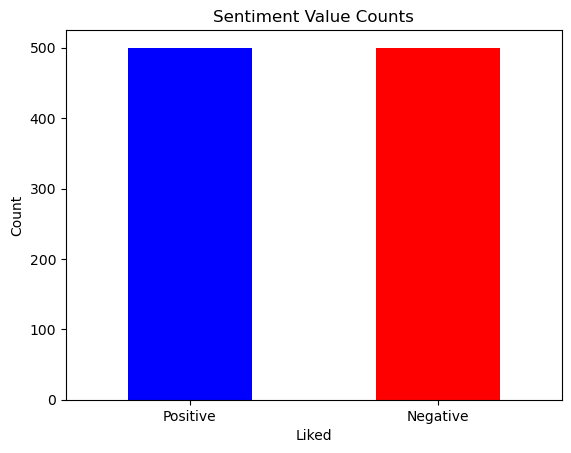

In [23]:
value_counts.plot(kind='bar' , color = ['blue','red'])
plt.title("Sentiment Value Counts")
plt.xlabel("Liked")
plt.ylabel("Count")
plt.xticks(ticks=[0,1], labels = ['Positive','Negative'],rotation = 0)
plt.show()

In [24]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [25]:
from wordcloud import WordCloud

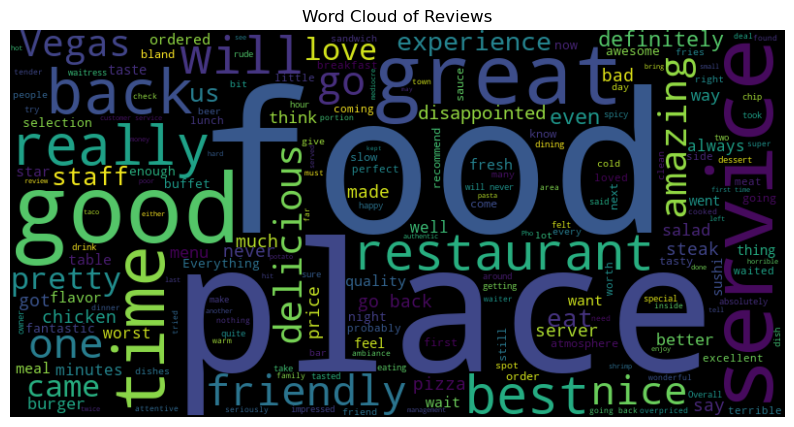

In [26]:
combined_text = " ".join(data['Review'])
wordcloud = WordCloud(width = 800 , height = 400 , background_color = 'black').generate(combined_text)
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.show()

In [27]:
pip install counter

Note: you may need to restart the kernel to use updated packages.


In [28]:
from collections import Counter

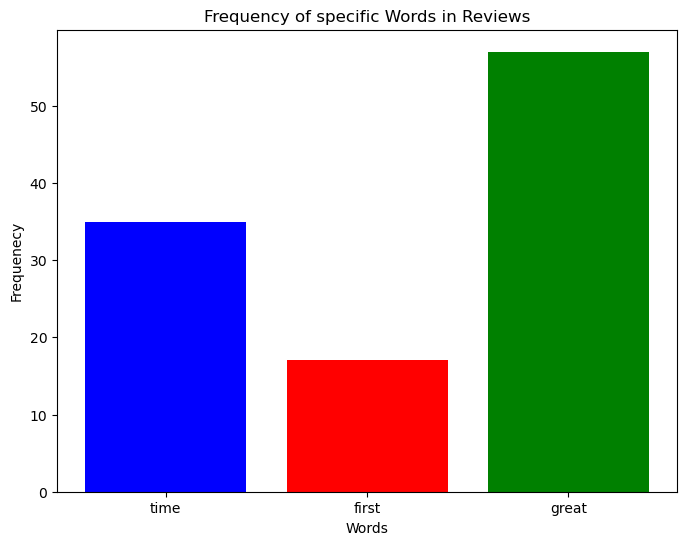

In [29]:
target_words = ['time','first','great']
all_words = " ".join(data['Review']).lower().split()
word_counts = Counter(all_words)
target_word_counts = {word:word_counts[word] for word in target_words}
plt.figure(figsize=(8,6))
plt.bar(target_word_counts.keys(),target_word_counts.values(),color = ['blue','red','green'])
plt.xlabel("Words")
plt.ylabel("Frequenecy")
plt.title("Frequency of specific Words in Reviews")
plt.show()

In [30]:
# Text preprocessing

In [31]:
# convert a dataset into lower case
lowercased_text = data['Review'].str.lower()

In [32]:
print(lowercased_text)

0                               wow... loved this place.
1                                     crust is not good.
2              not tasty and the texture was just nasty.
3      stopped by during the late may bank holiday of...
4      the selection on the menu was great and so wer...
                             ...                        
995    i think food should have flavor and texture an...
996                             appetite instantly gone.
997    overall i was not impressed and would not go b...
998    the whole experience was underwhelming, and i ...
999    then, as if i hadn't wasted enough of my life ...
Name: Review, Length: 1000, dtype: object


In [33]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [39]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\manig\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


In [50]:
data['tokens'] = data['Review'].apply(word_tokenize)

In [51]:
print(data['tokens'])

0                      [Wow, ..., Loved, this, place, .]
1                              [Crust, is, not, good, .]
2      [Not, tasty, and, the, texture, was, just, nas...
3      [Stopped, by, during, the, late, May, bank, ho...
4      [The, selection, on, the, menu, was, great, an...
                             ...                        
995    [I, think, food, should, have, flavor, and, te...
996                       [Appetite, instantly, gone, .]
997    [Overall, I, was, not, impressed, and, would, ...
998    [The, whole, experience, was, underwhelming, ,...
999    [Then, ,, as, if, I, had, n't, wasted, enough,...
Name: tokens, Length: 1000, dtype: object


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
 2   Tokens  1000 non-null   object
dtypes: int64(1), object(2)
memory usage: 23.6+ KB


In [47]:
data['Review'].value_counts()

Review
#NAME?                                                                                                                                    4
The food was terrible.                                                                                                                    2
I would not recommend this place.                                                                                                         2
I love this place.                                                                                                                        2
I won't be back.                                                                                                                          2
                                                                                                                                         ..
OMG, the food was delicioso!                                                                                                              1
There is noth

In [45]:
import string

In [6]:
data['Review'] = data['Review'].str.replace(f"[{string.punctuation}]"," ",regex = True)

SyntaxError: closing parenthesis ']' does not match opening parenthesis '(' (2421484516.py, line 1)

In [ ]:
print(data['Review'])
data['Review'].value_counts()

In [ ]:
# Removing the stop words like this , is , are , was

from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')


In [ ]:
stop_words = set(stopwords.words('english')) 

In [ ]:
data['Tokens'] = data['Review'].apply(lambda x:[word for word in word-tokenize(x) if word not in stop_words])

In [ ]:
print(data['Tokens'])

In [ ]:
# stemming 
# stemming is the process of reducing a word into root ar base word form by removing suffix
#example : driving stemmed is drive

In [ ]:
#stemming
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

In [ ]:
stemmer = PorterStemmer()

In [ ]:
data['stemmed'] = data['Review'].apply(lambda x: ' '.join([stemmer.stem(word) for word in word_tokenize(x)]))
print(data['stemmed'])

In [ ]:
#Lemmatization 
# lemmatization is a process transforming a word into its base or dictionary form
#example is better is lemmatized to good

In [ ]:
import nltk
nltk.download('wordnet')

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet

In [ ]:
lemmatizer = WordNetLemmatizer()

In [ ]:
data['Lemmatized'] = data['Review'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word , pos = wordnet.VERB) for word in word_tokenize(x)]))
print(data['Lemmatized'])

In [ ]:
# Removing the numbers from reviews
import re
data['No_Numbers'] = data['Review'].apply(lambda x: re.sub(r'\d+',' '  , x))

In [ ]:
print(data['No_Numbers'])

In [ ]:
#Removing special characters like @ # % *
data['cleaned'] = data['Review'].apply(lambda x: re.sub(r'[^A-Za-z0-9\s]',' ' ,x))

In [ ]:
print(data['cleaned'])

In [ ]:
# expanding method
# don't eat food in this hotel , when we apply exoanted text it will convert into do not eat food in this food

In [ ]:
pip install contractions

In [ ]:
import contractions
data['Expanded'] = data['Review'].apply(contractions.fix)

In [ ]:
print(data['Expanded'])

In [ ]:
#Removing emojis
!pip install emoji

In [ ]:
import emoji
data['emoji'] = data['Review'].apply(emoji.demojize)

In [ ]:
print(data['emoji'])

In [ ]:
!pip install beautifulsoup4

In [ ]:
from bs4 import BeautifulSoup

In [ ]:
data['cleaned'] = data['Review'].apply(lambda x: BeautifulSoup(x,"html.parser").get_text())